In [1]:
from face_detection import MtcnnDetector

In [2]:
detector = MtcnnDetector()

model folder: /workdir/face_detection/trained_model


In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
img = cv2.imread('../sample/face.jpg')

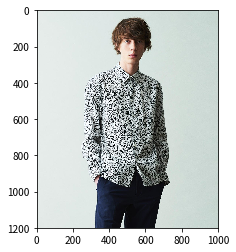

In [33]:
plt.imshow(img[:, :, ::-1])

In [34]:
class NotDetectionError(Exception):
    pass

def clip_most_humanise_image(detector, image, target_size, padding_ratio):
    """
    画像の中で最も人間である確率の高い画像を一枚だけ返す.
    :param MtcnnDetector detector:
    :param image:
    :param int target_size:
    :param float padding_ratio:
    :return:
    """
    result = detector.detect_face(image)
    if result is None:
        raise NotDetectionError

    boxes, points = result
    chips = detector.extract_image_chips(image, points, desired_size=target_size, padding=padding_ratio)
    face_scores = boxes[:, -1]
    face_center = (boxes[:, 0] + boxes[:, 2]) / 2, (boxes[:, 1] + boxes[:, 3]) / 2
    box_areas = [(b[0] - b[2]) * (b[1] - b[3]) for b in boxes]
    max_idx = np.argmax(box_areas)
    best_face = chips[max_idx]
    best_score = face_scores[max_idx]
    return best_face, best_score

In [35]:
clipped_img, prob = clip_most_humanise_image(detector, img, target_size=200, padding_ratio=.3)

Text(0.5, 1.0, '0.9997639060020447')

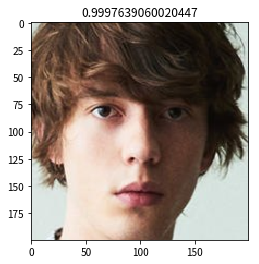

In [37]:
plt.imshow(clipped_img[:, :, ::-1])
plt.title(prob)

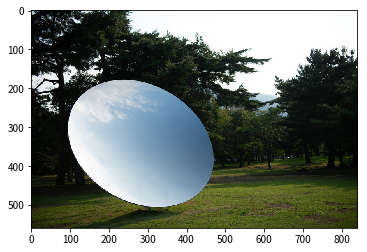

In [32]:
none_face = cv2.imread('../sample/none_face.jpg')
plt.imshow(none_face[:, :, ::-1])

In [29]:
clip_most_humanise_image(detector, none_face, target_size=200, padding_ratio=.3)

NotDetectionError: 

In [ ]:
class MtcnnFaceClipping:
    def __init__(self, use_cpu, workers=1, accurate_landmark=False):
        